# Module Training

In [1]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


In [2]:
# NumPy for numerical computing
import numpy as np
from sklearn.preprocessing import StandardScaler
# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

In [3]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
# Load cleaned dataset
df = pd.read_csv('data/analytical_base_table_with_features_no_loc.csv')

print(df.shape)

(5404, 34)


In [5]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split # Scikit-Learn 0.18+

In [6]:
# Create separate object for target variable
y = df.price
# Create separate object for input features
X = df.drop('price', axis=1)

In [7]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [8]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

4323 1081 4323 1081


Next, when we train our models, we can fit them on the X_train feature values and y_train target values.
Finally, when we're ready to evaluate our models on our test set, we would use the trained models to predict X_test and evaluate the predictions against y_test.

In [9]:
# Summary statistics of X_train
X_train.describe()

,listing_id,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,price_change_percent,two_and_two,double_glazing,renovated,ad_age_days,distance_edi,price_modifier_Missing,price_modifier_equity_loan,price_modifier_fixed_price,price_modifier_from,price_modifier_guide_price,price_modifier_offers_in_region_of,price_modifier_offers_over,price_modifier_price_on_request,property_type_Bungalow,property_type_Detached house,property_type_End terrace house,property_type_Flat,property_type_Maisonette,property_type_Missing,property_type_Other,property_type_Semi-detached house,property_type_Terraced house,heating_type_Missing,heating_type_electric,heating_type_gas,heating_type_oil
count,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000
mean,42890210.733,0.108,1.227,2.792,0.290,1.103,-1.453,0.061,0.409,0.071,207.527,45.663,0.124,0.001,0.082,0.006,0.060,0.146,0.576,0.004,0.083,0.200,0.036,0.383,0.013,0.031,0.065,0.091,0.099,0.498,0.074,0.411,0.017
std,4109056.085,0.310,0.941,1.155,0.715,0.909,4.326,0.239,0.492,0.256,359.252,29.358,0.330,0.037,0.274,0.080,0.238,0.353,0.494,0.064,0.275,0.400,0.187,0.486,0.112,0.173,0.246,0.288,0.299,0.500,0.262,0.492,0.130
min,14444098.000,0.000,0.000,0.000,0.000,0.000,-51.600,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,43064827.000,0.000,1.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,26.000,31.507,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,44188195.000,0.000,1.000,3.000,0.000,1.000,0.000,0.000,0.000,0.000,78.000,40.721,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,44697065.000,0.000,2.000,4.000,0.000,2.000,0.000,0.000,1.000,0.000,195.000,62.706,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
max,44896099.000,1.000,5.000,6.000,4.000,6.000,58.100,1.000,1.000,1.000,3088.000,117.600,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [10]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()

In [11]:
# Summary statistics of X_train_new
X_train_new.describe()

,listing_id,new_home,num_bathrooms,num_bedrooms,num_floors,num_recepts,price_change_percent,two_and_two,double_glazing,renovated,ad_age_days,distance_edi,price_modifier_Missing,price_modifier_equity_loan,price_modifier_fixed_price,price_modifier_from,price_modifier_guide_price,price_modifier_offers_in_region_of,price_modifier_offers_over,price_modifier_price_on_request,property_type_Bungalow,property_type_Detached house,property_type_End terrace house,property_type_Flat,property_type_Maisonette,property_type_Missing,property_type_Other,property_type_Semi-detached house,property_type_Terraced house,heating_type_Missing,heating_type_electric,heating_type_gas,heating_type_oil
count,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000,4323.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-6.923,-0.347,-1.303,-2.418,-0.405,-1.214,-11.593,-0.255,-0.831,-0.275,-0.569,-1.555,-0.376,-0.037,-0.299,-0.081,-0.253,-0.414,-1.164,-0.065,-0.300,-0.499,-0.193,-0.788,-0.114,-0.179,-0.263,-0.317,-0.332,-0.995,-0.283,-0.835,-0.132
25%,0.042,-0.347,-0.241,-0.686,-0.405,-1.214,0.336,-0.255,-0.831,-0.275,-0.505,-0.482,-0.376,-0.037,-0.299,-0.081,-0.253,-0.414,-1.164,-0.065,-0.300,-0.499,-0.193,-0.788,-0.114,-0.179,-0.263,-0.317,-0.332,-0.995,-0.283,-0.835,-0.132
50%,0.316,-0.347,-0.241,0.181,-0.405,-0.114,0.336,-0.255,-0.831,-0.275,-0.361,-0.168,-0.376,-0.037,-0.299,-0.081,-0.253,-0.414,0.859,-0.065,-0.300,-0.499,-0.193,-0.788,-0.114,-0.179,-0.263,-0.317,-0.332,-0.995,-0.283,-0.835,-0.132
75%,0.440,-0.347,0.821,1.047,-0.405,0.986,0.336,-0.255,1.203,-0.275,-0.035,0.581,-0.376,-0.037,-0.299,-0.081,-0.253,-0.414,0.859,-0.065,-0.300,-0.499,-0.193,1.269,-0.114,-0.179,-0.263,-0.317,-0.332,1.004,-0.283,1.197,-0.132
max,0.488,2.880,4.008,2.779,5.186,5.387,13.767,3.921,1.203,3.629,8.018,2.450,2.658,26.820,3.348,12.384,3.945,2.416,0.859,15.463,3.333,2.002,5.168,1.269,8.808,5.591,3.807,3.157,3.012,1.004,3.530,1.197,7.577


In [12]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [13]:
# For standardization
from sklearn.preprocessing import StandardScaler

Next, creating a pipelines dictionary.
It should include 3 keys: 'lasso', 'ridge', and 'enet'
The corresponding values should be pipelines that first standardize the data.
For the algorithm in each pipeline, setting random_state=123 to ensure replicable results.

In [15]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123))
}

In [16]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

In [17]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [18]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}
# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}
# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [19]:
# Random forest hyperparameters
rf_hyperparameters = {
   'randomforestregressor__n_estimators': [100, 200],
   'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}
# Boosted tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [20]:
# Create hyperparameters dictionary
print(pipelines.keys())
hyperparameters = {
    'enet': enet_hyperparameters,
    'gb': gb_hyperparameters,
    'ridge': ridge_hyperparameters,
    'rf': rf_hyperparameters,
    'lasso': lasso_hyperparameters,
}

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])


In [21]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [22]:
# Helper for cross-validation

from sklearn.model_selection import GridSearchCV

In [23]:

# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [26]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipelines[name], hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

lasso has been fitted.
ridge has been fitted.


/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

enet has been fitted.
rf has been fitted.
gb has been fitted.


In [27]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [28]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [29]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.489827515084
ridge 0.489900048754
enet 0.49019089318
rf 0.685472803113
gb 0.687817016636


In [30]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [31]:
# Display fitted random forest object
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
# Code here
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print('\n------')
    print(name)
    print('-------')
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))


------
lasso
-------
R^2: 0.50080289759
MAE: 66186.0394927

------
ridge
-------
R^2: 0.500620944165
MAE: 66173.0800332

------
enet
-------
R^2: 0.498684930442
MAE: 66019.2231266

------
rf
-------
R^2: 0.716114152514
MAE: 48219.2151249

------
gb
-------
R^2: 0.746832791347
MAE: 46487.3294886


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


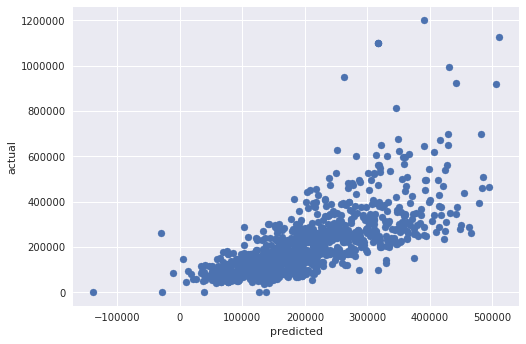

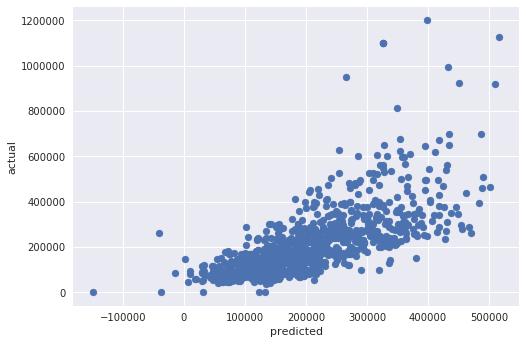

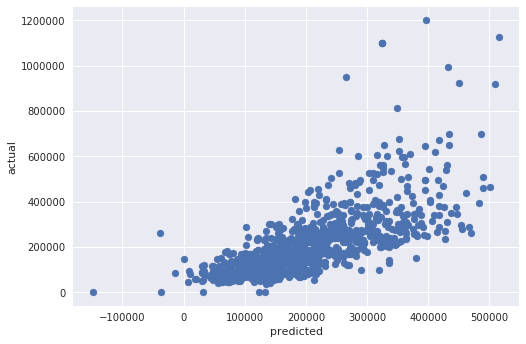

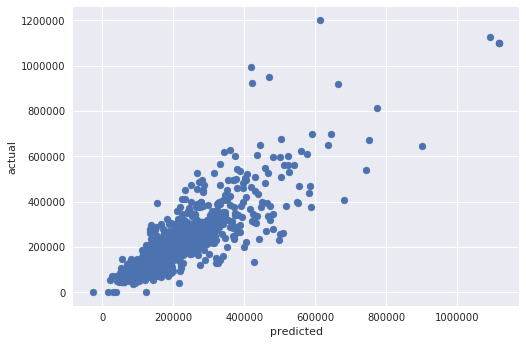

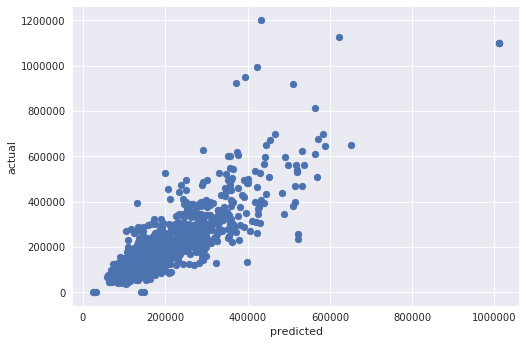

In [34]:
gb_pred = fitted_models['enet'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()
gb_pred = fitted_models['lasso'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()
gb_pred = fitted_models['ridge'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [35]:
type(fitted_models['gb'])

sklearn.model_selection._search.GridSearchCV

In [36]:
type(fitted_models['gb'].best_estimator_)

sklearn.pipeline.Pipeline

In [37]:
fitted_models['gb'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, mi...        presort='auto', random_state=123, subsample=1.0, verbose=0,
             warm_start=False))])

In [38]:
import pickle

In [39]:
with open('data/final_model_with_features.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb'].best_estimator_, f)

In [38]:
df_to_split = pd.read_csv('data/raw_combined_properties_final.csv', low_memory=False)

In [43]:
with open('data/final_model_with_features.pkl', 'rb') as f:
    model = pickle.load(f)
model

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.33, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))])